# PIMA Dataset Prediction Modelling with KERAS
---

Implement a Deep Neural Network with KERAS on the Pima Indians Diabetes Database (https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from __future__ import print_function
import tensorflow as tf
from six.moves import range
import numpy as np
import os
import sys

from IPython.display import display, Image
import matplotlib.pyplot as plt
# Config the matlotlib backend as plotting inline in IPython
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.contrib import keras
from keras import models, layers, losses, optimizers, metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


Using TensorFlow backend.


['diabetes.csv']


## Data Preprocessing

In [2]:
df = pd.read_csv('../input/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Splitting into training and testing datasets

X = df.drop(['Outcome'], axis=1)
Y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

---

## Data Visualization

We first plot a 'histogram' of all data as-is.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4254deb780>,
      dtype=object)

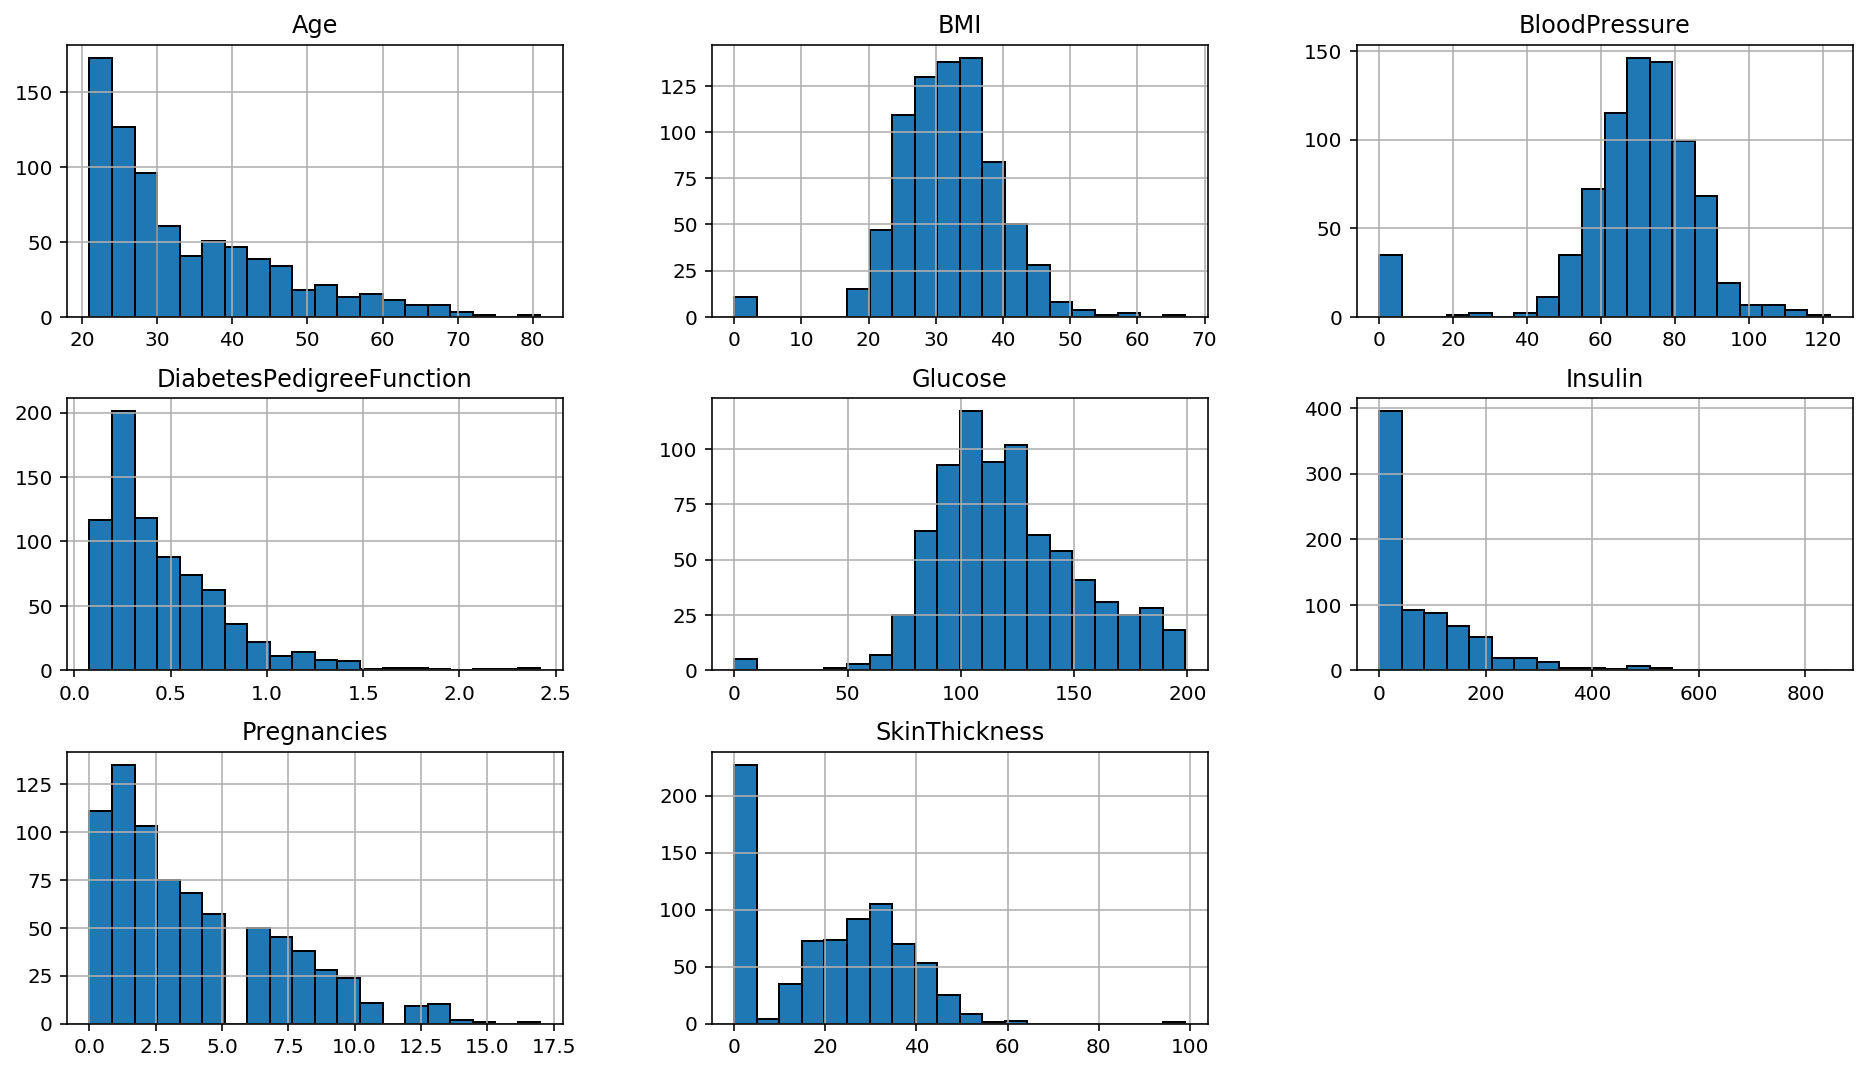

In [5]:
X.hist(figsize=(16,9), edgecolor="black", bins=20)

Now, we plot the histogram of the Diabetic Outcomes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f424ef494a8>,
      dtype=object)

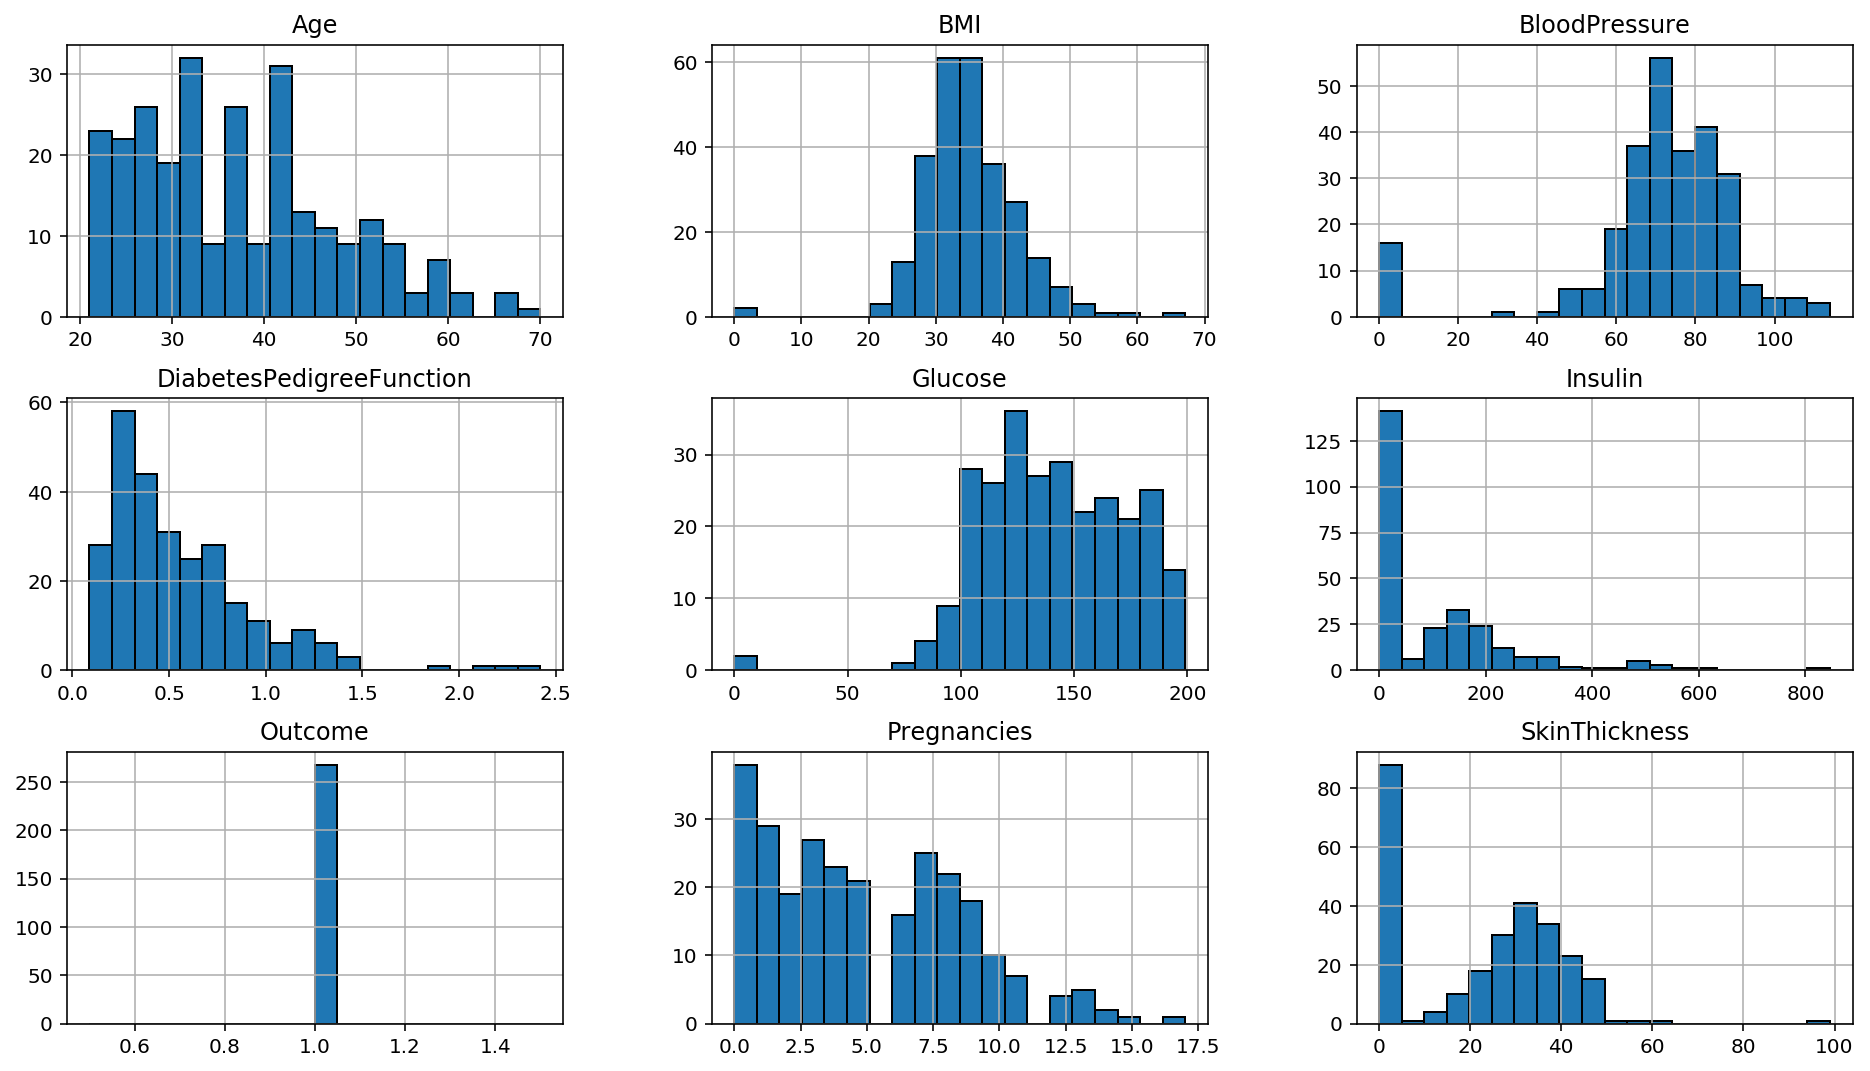

In [22]:
# Diabetic Outcomes
x_aff = df[df['Outcome']==1]
x_aff.hist(figsize=(16,9), edgecolor="black", bins=20)

Next, we plot the Pair Plots - A plot of all variables against the each other to get an idea about the distribution of diabetic and non-diabetic trend.

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


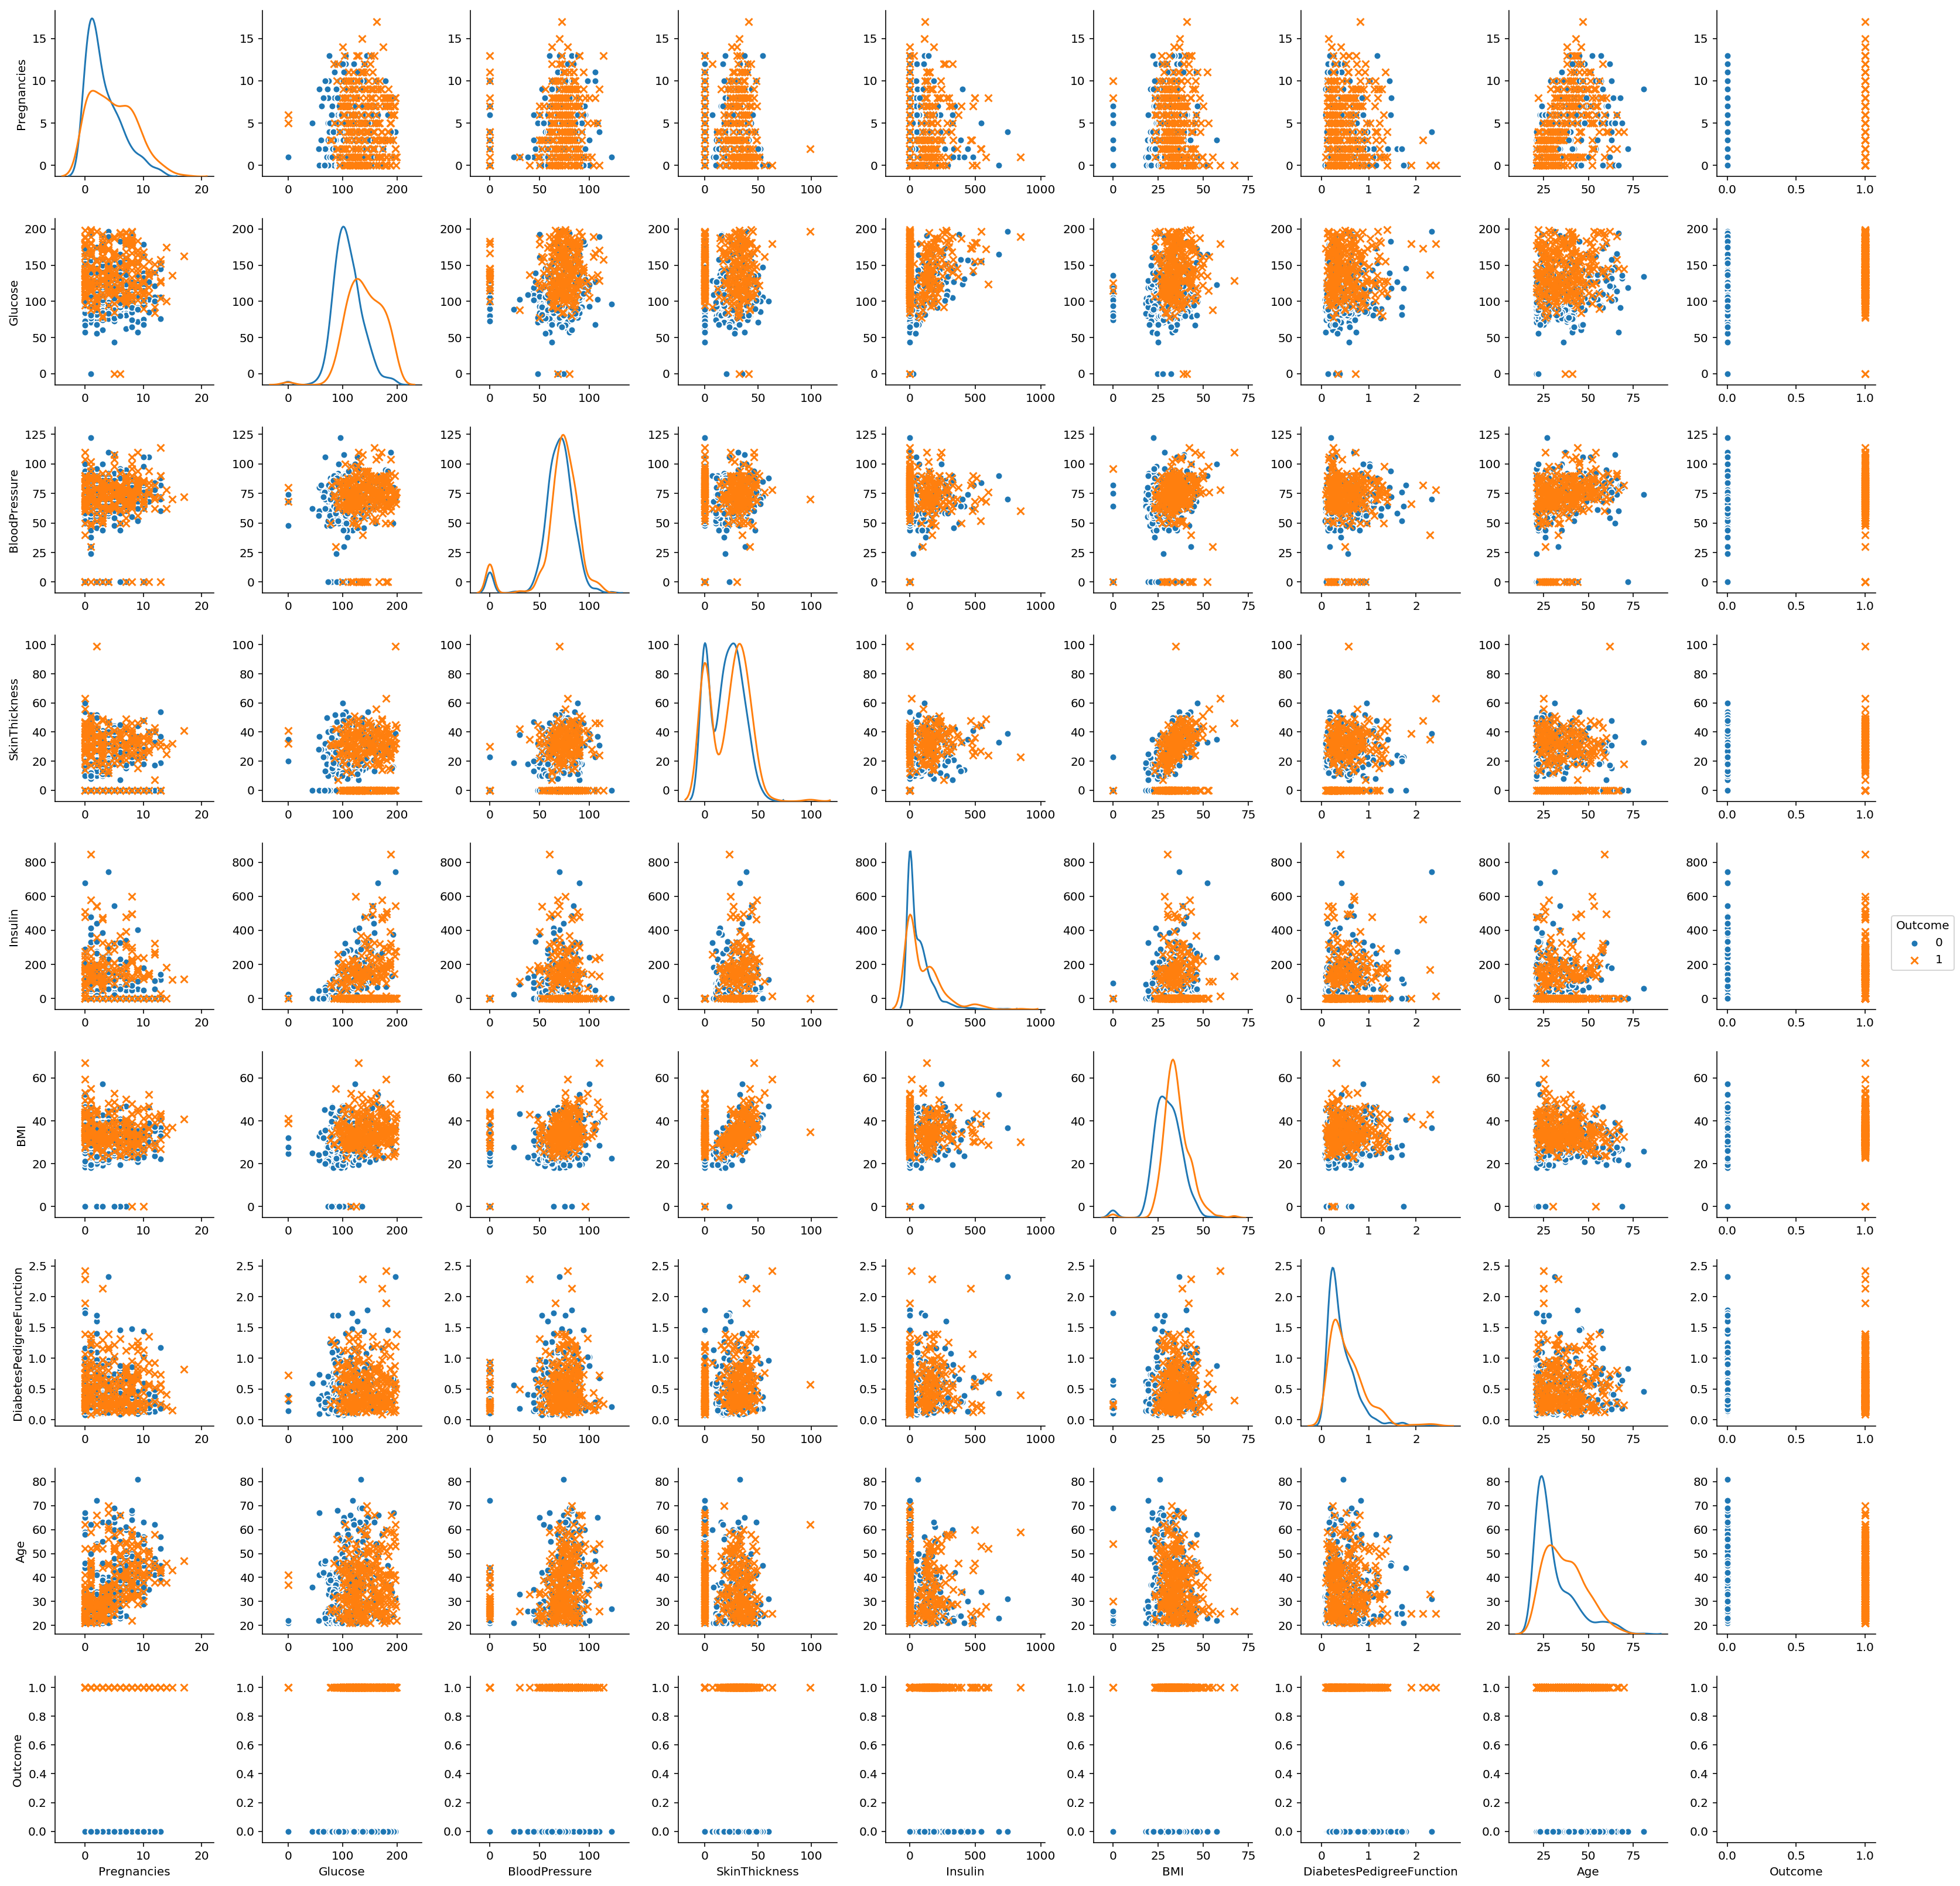

In [7]:
sns.pairplot(df, hue='Outcome', markers=['o', 'x'], diag_kind='kde')

---

## Data Scaling

We scale the data so as to increase the model accuracy.

In [8]:
scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

---

## KERAS DATA MODEL

We will use the following parameters in our implementation -

* Hidden Layers - 3 , each consisiting of 8 neurons.
* Activation - RELU for hidden, SOFTMAX for output layer.
* Optimizer - SGD
* Learning Rate Decay - 0.0001
* L2 Regularization


In [18]:
# Create Keras DNN Model

model = models.Sequential()

# Hyperparameters
hold_prob = 0.0
beta = 1e-6
alpha = 0.05
lr_decay = 0.01
iterations = 1000
validation_split = 0.5
opt_momentum = 0.8 # (Use only for SGD)

# Optimizer
opt = optimizers.SGD(lr=alpha, decay=lr_decay, momentum=opt_momentum, nesterov=True)

# First Layer
model.add(layers.Dense(input_dim=8, units=8, activation='relu'))

# Hidden Layers
model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

# Output Layer
model.add(layers.Dense(units=2, activation='softmax'))

# Compiling the Model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(x=scaled_x_train, y=y_train, epochs=iterations, validation_split=validation_split)

Train on 268 samples, validate on 269 samples
Epoch 1/1000
268/268 [==============================] - 0s 1ms/step - loss: 0.6713 - acc: 0.6343 - val_loss: 0.6460 - val_acc: 0.6580
Epoch 2/1000
268/268 [==============================] - 0s 100us/step - loss: 0.6521 - acc: 0.6455 - val_loss: 0.6430 - val_acc: 0.6580
Epoch 3/1000
268/268 [==============================] - 0s 89us/step - loss: 0.6509 - acc: 0.6455 - val_loss: 0.6428 - val_acc: 0.6580
Epoch 4/1000
268/268 [==============================] - 0s 91us/step - loss: 0.6491 - acc: 0.6455 - val_loss: 0.6414 - val_acc: 0.6580
Epoch 5/1000
268/268 [==============================] - 0s 92us/step - loss: 0.6479 - acc: 0.6455 - val_loss: 0.6398 - val_acc: 0.6580
Epoch 6/1000
268/268 [==============================] - 0s 84us/step - loss: 0.6459 - acc: 0.6455 - val_loss: 0.6392 - val_acc: 0.6580
Epoch 7/1000
268/268 [==============================] - 0s 85us/step - loss: 0.6454 - acc: 0.6455 - val_loss: 0.6374 - val_acc: 0.6580
Epoch 8/1

Epoch 61/1000
268/268 [==============================] - 0s 81us/step - loss: 0.4783 - acc: 0.7799 - val_loss: 0.4908 - val_acc: 0.7509
Epoch 62/1000
268/268 [==============================] - 0s 81us/step - loss: 0.4932 - acc: 0.7724 - val_loss: 0.4744 - val_acc: 0.7584
Epoch 63/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4792 - acc: 0.7799 - val_loss: 0.4760 - val_acc: 0.7584
Epoch 64/1000
268/268 [==============================] - 0s 78us/step - loss: 0.4821 - acc: 0.7649 - val_loss: 0.4731 - val_acc: 0.7732
Epoch 65/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4858 - acc: 0.7799 - val_loss: 0.4762 - val_acc: 0.7546
Epoch 66/1000
268/268 [==============================] - 0s 78us/step - loss: 0.4811 - acc: 0.7500 - val_loss: 0.4750 - val_acc: 0.7621
Epoch 67/1000
268/268 [==============================] - 0s 78us/step - loss: 0.4746 - acc: 0.7799 - val_loss: 0.4852 - val_acc: 0.7621
Epoch 68/1000
268/268 [=========================

Epoch 121/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4623 - acc: 0.7873 - val_loss: 0.4920 - val_acc: 0.7435
Epoch 122/1000
268/268 [==============================] - 0s 87us/step - loss: 0.4665 - acc: 0.7948 - val_loss: 0.4758 - val_acc: 0.7509
Epoch 123/1000
268/268 [==============================] - 0s 83us/step - loss: 0.4632 - acc: 0.8022 - val_loss: 0.4785 - val_acc: 0.7472
Epoch 124/1000
268/268 [==============================] - 0s 83us/step - loss: 0.4623 - acc: 0.7948 - val_loss: 0.4806 - val_acc: 0.7509
Epoch 125/1000
268/268 [==============================] - 0s 83us/step - loss: 0.4610 - acc: 0.7948 - val_loss: 0.4780 - val_acc: 0.7509
Epoch 126/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4630 - acc: 0.7873 - val_loss: 0.4915 - val_acc: 0.7398
Epoch 127/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4639 - acc: 0.7985 - val_loss: 0.4893 - val_acc: 0.7435
Epoch 128/1000
268/268 [=================

Epoch 181/1000
268/268 [==============================] - 0s 87us/step - loss: 0.4549 - acc: 0.7910 - val_loss: 0.4951 - val_acc: 0.7435
Epoch 182/1000
268/268 [==============================] - 0s 99us/step - loss: 0.4560 - acc: 0.7910 - val_loss: 0.4824 - val_acc: 0.7435
Epoch 183/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4564 - acc: 0.7873 - val_loss: 0.4827 - val_acc: 0.7435
Epoch 184/1000
268/268 [==============================] - 0s 96us/step - loss: 0.4544 - acc: 0.7910 - val_loss: 0.4893 - val_acc: 0.7509
Epoch 185/1000
268/268 [==============================] - 0s 81us/step - loss: 0.4562 - acc: 0.7873 - val_loss: 0.4831 - val_acc: 0.7435
Epoch 186/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4535 - acc: 0.7910 - val_loss: 0.4821 - val_acc: 0.7398
Epoch 187/1000
268/268 [==============================] - 0s 85us/step - loss: 0.4577 - acc: 0.7948 - val_loss: 0.4814 - val_acc: 0.7361
Epoch 188/1000
268/268 [=================

Epoch 241/1000
268/268 [==============================] - 0s 85us/step - loss: 0.4489 - acc: 0.7985 - val_loss: 0.4903 - val_acc: 0.7398
Epoch 242/1000
268/268 [==============================] - 0s 88us/step - loss: 0.4498 - acc: 0.7948 - val_loss: 0.4892 - val_acc: 0.7509
Epoch 243/1000
268/268 [==============================] - 0s 87us/step - loss: 0.4478 - acc: 0.7948 - val_loss: 0.4878 - val_acc: 0.7509
Epoch 244/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4481 - acc: 0.7873 - val_loss: 0.4852 - val_acc: 0.7435
Epoch 245/1000
268/268 [==============================] - 0s 79us/step - loss: 0.4513 - acc: 0.7873 - val_loss: 0.4899 - val_acc: 0.7472
Epoch 246/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4507 - acc: 0.7873 - val_loss: 0.4963 - val_acc: 0.7509
Epoch 247/1000
268/268 [==============================] - 0s 85us/step - loss: 0.4501 - acc: 0.7985 - val_loss: 0.4848 - val_acc: 0.7398
Epoch 248/1000
268/268 [=================

Epoch 301/1000
268/268 [==============================] - 0s 83us/step - loss: 0.4491 - acc: 0.7873 - val_loss: 0.4944 - val_acc: 0.7361
Epoch 302/1000
268/268 [==============================] - 0s 93us/step - loss: 0.4533 - acc: 0.7910 - val_loss: 0.4914 - val_acc: 0.7361
Epoch 303/1000
268/268 [==============================] - 0s 81us/step - loss: 0.4439 - acc: 0.8022 - val_loss: 0.4868 - val_acc: 0.7398
Epoch 304/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4449 - acc: 0.7948 - val_loss: 0.4874 - val_acc: 0.7398
Epoch 305/1000
268/268 [==============================] - 0s 85us/step - loss: 0.4449 - acc: 0.7985 - val_loss: 0.4896 - val_acc: 0.7361
Epoch 306/1000
268/268 [==============================] - 0s 87us/step - loss: 0.4439 - acc: 0.8022 - val_loss: 0.4891 - val_acc: 0.7398
Epoch 307/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4453 - acc: 0.7985 - val_loss: 0.4889 - val_acc: 0.7472
Epoch 308/1000
268/268 [=================

Epoch 361/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4409 - acc: 0.7873 - val_loss: 0.4944 - val_acc: 0.7323
Epoch 362/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4419 - acc: 0.7948 - val_loss: 0.4888 - val_acc: 0.7398
Epoch 363/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4401 - acc: 0.8060 - val_loss: 0.4910 - val_acc: 0.7398
Epoch 364/1000
268/268 [==============================] - 0s 86us/step - loss: 0.4394 - acc: 0.7873 - val_loss: 0.4921 - val_acc: 0.7398
Epoch 365/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4408 - acc: 0.7910 - val_loss: 0.4874 - val_acc: 0.7435
Epoch 366/1000
268/268 [==============================] - 0s 83us/step - loss: 0.4411 - acc: 0.7948 - val_loss: 0.4896 - val_acc: 0.7361
Epoch 367/1000
268/268 [==============================] - 0s 78us/step - loss: 0.4438 - acc: 0.7910 - val_loss: 0.4902 - val_acc: 0.7361
Epoch 368/1000
268/268 [=================

Epoch 421/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4354 - acc: 0.8022 - val_loss: 0.4957 - val_acc: 0.7361
Epoch 422/1000
268/268 [==============================] - 0s 79us/step - loss: 0.4365 - acc: 0.7985 - val_loss: 0.4935 - val_acc: 0.7472
Epoch 423/1000
268/268 [==============================] - 0s 77us/step - loss: 0.4356 - acc: 0.7948 - val_loss: 0.4920 - val_acc: 0.7398
Epoch 424/1000
268/268 [==============================] - 0s 81us/step - loss: 0.4360 - acc: 0.7985 - val_loss: 0.4945 - val_acc: 0.7398
Epoch 425/1000
268/268 [==============================] - 0s 95us/step - loss: 0.4390 - acc: 0.7985 - val_loss: 0.4959 - val_acc: 0.7361
Epoch 426/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4410 - acc: 0.7836 - val_loss: 0.4941 - val_acc: 0.7472
Epoch 427/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4360 - acc: 0.8022 - val_loss: 0.4912 - val_acc: 0.7398
Epoch 428/1000
268/268 [=================

Epoch 481/1000
268/268 [==============================] - 0s 165us/step - loss: 0.4328 - acc: 0.8060 - val_loss: 0.4904 - val_acc: 0.7398
Epoch 482/1000
268/268 [==============================] - 0s 158us/step - loss: 0.4331 - acc: 0.8022 - val_loss: 0.4922 - val_acc: 0.7398
Epoch 483/1000
268/268 [==============================] - 0s 159us/step - loss: 0.4320 - acc: 0.8022 - val_loss: 0.4921 - val_acc: 0.7398
Epoch 484/1000
268/268 [==============================] - 0s 150us/step - loss: 0.4329 - acc: 0.7985 - val_loss: 0.4917 - val_acc: 0.7398
Epoch 485/1000
268/268 [==============================] - 0s 139us/step - loss: 0.4330 - acc: 0.7948 - val_loss: 0.4932 - val_acc: 0.7472
Epoch 486/1000
268/268 [==============================] - 0s 157us/step - loss: 0.4357 - acc: 0.7985 - val_loss: 0.4919 - val_acc: 0.7398
Epoch 487/1000
268/268 [==============================] - 0s 154us/step - loss: 0.4325 - acc: 0.8022 - val_loss: 0.4902 - val_acc: 0.7398
Epoch 488/1000
268/268 [==========

Epoch 600/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4254 - acc: 0.8022 - val_loss: 0.4953 - val_acc: 0.7546
Epoch 601/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4250 - acc: 0.8060 - val_loss: 0.4946 - val_acc: 0.7509
Epoch 602/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4257 - acc: 0.7985 - val_loss: 0.4962 - val_acc: 0.7472
Epoch 603/1000
268/268 [==============================] - 0s 99us/step - loss: 0.4252 - acc: 0.7985 - val_loss: 0.4947 - val_acc: 0.7509
Epoch 604/1000
268/268 [==============================] - 0s 88us/step - loss: 0.4257 - acc: 0.8097 - val_loss: 0.4945 - val_acc: 0.7472
Epoch 605/1000
268/268 [==============================] - 0s 79us/step - loss: 0.4259 - acc: 0.7948 - val_loss: 0.4949 - val_acc: 0.7472
Epoch 606/1000
268/268 [==============================] - 0s 92us/step - loss: 0.4245 - acc: 0.7985 - val_loss: 0.4944 - val_acc: 0.7472
Epoch 607/1000
268/268 [=================

Epoch 660/1000
268/268 [==============================] - 0s 81us/step - loss: 0.4229 - acc: 0.8097 - val_loss: 0.4954 - val_acc: 0.7472
Epoch 661/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4220 - acc: 0.8060 - val_loss: 0.4945 - val_acc: 0.7435
Epoch 662/1000
268/268 [==============================] - 0s 88us/step - loss: 0.4223 - acc: 0.8097 - val_loss: 0.4964 - val_acc: 0.7472
Epoch 663/1000
268/268 [==============================] - 0s 87us/step - loss: 0.4241 - acc: 0.8097 - val_loss: 0.4981 - val_acc: 0.7361
Epoch 664/1000
268/268 [==============================] - 0s 83us/step - loss: 0.4221 - acc: 0.8060 - val_loss: 0.4957 - val_acc: 0.7435
Epoch 665/1000
268/268 [==============================] - 0s 93us/step - loss: 0.4214 - acc: 0.8134 - val_loss: 0.4956 - val_acc: 0.7472
Epoch 666/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4214 - acc: 0.8172 - val_loss: 0.4960 - val_acc: 0.7472
Epoch 667/1000
268/268 [=================

Epoch 720/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4218 - acc: 0.8097 - val_loss: 0.4967 - val_acc: 0.7472
Epoch 721/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4190 - acc: 0.8097 - val_loss: 0.4979 - val_acc: 0.7435
Epoch 722/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4182 - acc: 0.8060 - val_loss: 0.4988 - val_acc: 0.7398
Epoch 723/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4197 - acc: 0.8060 - val_loss: 0.4965 - val_acc: 0.7472
Epoch 724/1000
268/268 [==============================] - 0s 83us/step - loss: 0.4179 - acc: 0.8172 - val_loss: 0.4953 - val_acc: 0.7398
Epoch 725/1000
268/268 [==============================] - 0s 93us/step - loss: 0.4189 - acc: 0.8172 - val_loss: 0.4993 - val_acc: 0.7323
Epoch 726/1000
268/268 [==============================] - 0s 81us/step - loss: 0.4205 - acc: 0.8060 - val_loss: 0.4985 - val_acc: 0.7323
Epoch 727/1000
268/268 [=================

Epoch 780/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4156 - acc: 0.8134 - val_loss: 0.4985 - val_acc: 0.7435
Epoch 781/1000
268/268 [==============================] - 0s 83us/step - loss: 0.4160 - acc: 0.8097 - val_loss: 0.4994 - val_acc: 0.7361
Epoch 782/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4174 - acc: 0.8097 - val_loss: 0.4996 - val_acc: 0.7323
Epoch 783/1000
268/268 [==============================] - 0s 79us/step - loss: 0.4170 - acc: 0.8060 - val_loss: 0.4990 - val_acc: 0.7435
Epoch 784/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4166 - acc: 0.8097 - val_loss: 0.4984 - val_acc: 0.7398
Epoch 785/1000
268/268 [==============================] - 0s 81us/step - loss: 0.4154 - acc: 0.8060 - val_loss: 0.4983 - val_acc: 0.7435
Epoch 786/1000
268/268 [==============================] - 0s 94us/step - loss: 0.4164 - acc: 0.8060 - val_loss: 0.4976 - val_acc: 0.7435
Epoch 787/1000
268/268 [=================

Epoch 840/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4134 - acc: 0.8097 - val_loss: 0.4996 - val_acc: 0.7361
Epoch 841/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4136 - acc: 0.8134 - val_loss: 0.4989 - val_acc: 0.7398
Epoch 842/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4137 - acc: 0.8097 - val_loss: 0.4980 - val_acc: 0.7361
Epoch 843/1000
268/268 [==============================] - 0s 81us/step - loss: 0.4140 - acc: 0.8172 - val_loss: 0.4971 - val_acc: 0.7435
Epoch 844/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4141 - acc: 0.8134 - val_loss: 0.4985 - val_acc: 0.7361
Epoch 845/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4132 - acc: 0.8134 - val_loss: 0.4999 - val_acc: 0.7472
Epoch 846/1000
268/268 [==============================] - 0s 100us/step - loss: 0.4140 - acc: 0.8060 - val_loss: 0.4986 - val_acc: 0.7361
Epoch 847/1000
268/268 [================

Epoch 900/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4146 - acc: 0.8097 - val_loss: 0.5014 - val_acc: 0.7398
Epoch 901/1000
268/268 [==============================] - 0s 79us/step - loss: 0.4122 - acc: 0.8022 - val_loss: 0.5066 - val_acc: 0.7361
Epoch 902/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4133 - acc: 0.8097 - val_loss: 0.5022 - val_acc: 0.7286
Epoch 903/1000
268/268 [==============================] - 0s 80us/step - loss: 0.4118 - acc: 0.8097 - val_loss: 0.5014 - val_acc: 0.7323
Epoch 904/1000
268/268 [==============================] - 0s 84us/step - loss: 0.4129 - acc: 0.8134 - val_loss: 0.5007 - val_acc: 0.7435
Epoch 905/1000
268/268 [==============================] - 0s 82us/step - loss: 0.4102 - acc: 0.8097 - val_loss: 0.4989 - val_acc: 0.7323
Epoch 906/1000
268/268 [==============================] - 0s 83us/step - loss: 0.4111 - acc: 0.8134 - val_loss: 0.4999 - val_acc: 0.7323
Epoch 907/1000
268/268 [=================

Epoch 960/1000
268/268 [==============================] - 0s 121us/step - loss: 0.4103 - acc: 0.8172 - val_loss: 0.5033 - val_acc: 0.7323
Epoch 961/1000
268/268 [==============================] - 0s 130us/step - loss: 0.4089 - acc: 0.8172 - val_loss: 0.5034 - val_acc: 0.7323
Epoch 962/1000
268/268 [==============================] - 0s 132us/step - loss: 0.4097 - acc: 0.8172 - val_loss: 0.5010 - val_acc: 0.7361
Epoch 963/1000
268/268 [==============================] - 0s 148us/step - loss: 0.4094 - acc: 0.8172 - val_loss: 0.5023 - val_acc: 0.7398
Epoch 964/1000
268/268 [==============================] - 0s 127us/step - loss: 0.4093 - acc: 0.8209 - val_loss: 0.5012 - val_acc: 0.7361
Epoch 965/1000
268/268 [==============================] - 0s 132us/step - loss: 0.4085 - acc: 0.8134 - val_loss: 0.5003 - val_acc: 0.7323
Epoch 966/1000
268/268 [==============================] - 0s 148us/step - loss: 0.4090 - acc: 0.8172 - val_loss: 0.5003 - val_acc: 0.7323
Epoch 967/1000
268/268 [==========

**Training Accuracy ~ 80%**

**Validation Accuracy ~ 74%**

---

Let's check how our model performs on new data.

In [20]:
predictions = model.predict_classes(scaled_x_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.84      0.82       150
          1       0.68      0.62      0.65        81

avg / total       0.76      0.76      0.76       231



### Conclusion

Thus, with considerable hyperparameter tuning, we can achieve an accuracy of ~76-79% with KERAS, which is a decent accuracy level.